# MNIST 辨識手寫數字0~9

## 一、資料預處理

In [19]:
import numpy as np
import pandas as pd #版本要0.19.2以下，最新不行
from keras.utils import np_utils
np.random.seed(10)

#先load一發data
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [20]:
print('Train data: ',len(x_train_image))
print('Train label: ',len(y_train_label))

Train data:  60000
Train label:  60000


In [21]:
print('X_train_image', x_train_image.shape)
print('y_train_label', y_train_label.shape)

X_train_image (60000, 28, 28)
y_train_label (60000,)


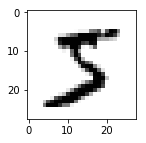

5

In [22]:
# 畫圖
import matplotlib.pyplot as plt 

def plot_image(image):
    figsize = (2,2)
    fig = plt.figure(figsize=figsize)
    plt.imshow(image, cmap='binary') #binary就是黑白
    plt.show()
    
plot_image(x_train_image[0])
y_train_label[0]

圖形辨識label+prediction常用函數

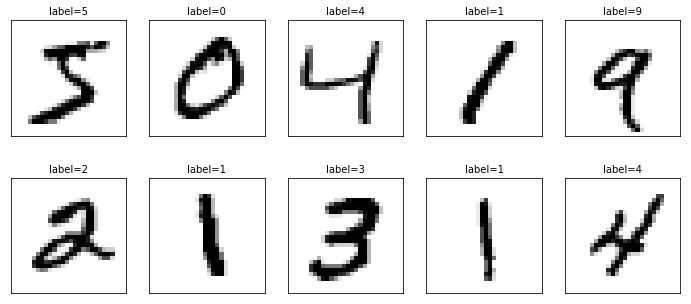

In [23]:
import matplotlib.pyplot as plt

#列出該image，顯示label，若是有prediction則一起列出，idx表示想列的起始圖, num表示往後延伸幾張圖（最多25張）
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #5行5列
        ax.imshow(images[idx], cmap='binary') #第idx張圖，黑白圖
        title= "label=" +str(labels[idx])
        if len(prediction)>0: #有prediction就多印出來
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
    
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10) #還沒做prediction，是空清單

In [24]:
#轉乘1x784，並且換成float32形式

x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [25]:
#input x 矩陣最大數值就是255，直接除下去normalize一下0~1

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [26]:
#output y 是0~9分類題onehot encode（表示向量只有對的選項是1、其他都是0）
#選擇題一律都使用categorical

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## 二、模型建立

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() #MLP，一層一層到底，按順序

#輸入層
model.add(Dense(units=300, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#隱藏層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary()) #可以清楚看到model還有參數數量

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
None


## 訓練模型

In [30]:
#選擇loss度量，optimizer學習路徑速度、
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#開始train，並且記錄情況(設有val項以免overfitting)
train_history=model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                        validation_split=0.2, epochs=10, batch_size=200, verbose=2) #verbose=2表示顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
4s - loss: 0.4193 - acc: 0.8872 - val_loss: 0.2049 - val_acc: 0.9440
Epoch 2/10
4s - loss: 0.1768 - acc: 0.9488 - val_loss: 0.1477 - val_acc: 0.9593
Epoch 3/10
4s - loss: 0.1241 - acc: 0.9649 - val_loss: 0.1193 - val_acc: 0.9659
Epoch 4/10
5s - loss: 0.0942 - acc: 0.9730 - val_loss: 0.1141 - val_acc: 0.9643
Epoch 5/10
5s - loss: 0.0741 - acc: 0.9793 - val_loss: 0.0972 - val_acc: 0.9713
Epoch 6/10
5s - loss: 0.0593 - acc: 0.9840 - val_loss: 0.0978 - val_acc: 0.9696
Epoch 7/10
5s - loss: 0.0487 - acc: 0.9860 - val_loss: 0.0872 - val_acc: 0.9718
Epoch 8/10
5s - loss: 0.0401 - acc: 0.9894 - val_loss: 0.0816 - val_acc: 0.9749
Epoch 9/10
5s - loss: 0.0318 - acc: 0.9920 - val_loss: 0.0793 - val_acc: 0.9748
Epoch 10/10
7s - loss: 0.0265 - acc: 0.9937 - val_loss: 0.0823 - val_acc: 0.9750


## 訓練過程視覺化（跟valiation比較，看有沒有under/overfitting情形）

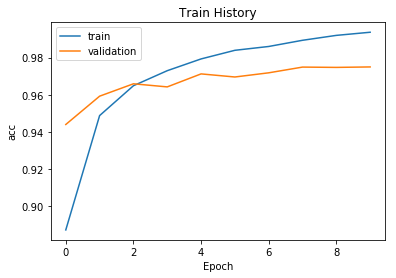

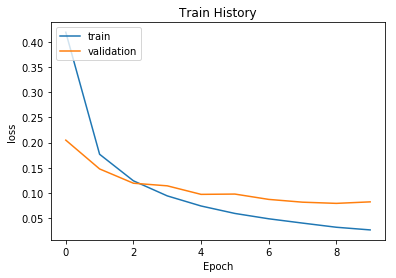

In [31]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率（實測test data）

In [32]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9376/10000 [===========================>..] - ETA: 0s
accuracy= 0.9774


## 進行預測

In [33]:
prediction=model.predict_classes(x_Test)

prediction #程式給test data的label答案卷

 9632/10000 [===========================>..] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6])

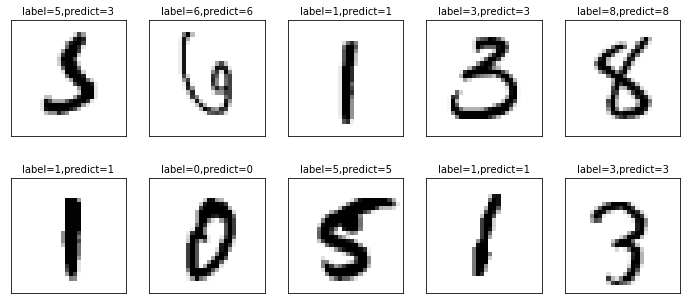

In [36]:
#直接看圖像視覺，可以看到第一個有錯誤
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340, num=10)

## Confusion matrix 混淆矩陣（直接統計出標準解和機器解的差別） 

In [37]:
import pandas as pd

#crosstab統計混淆矩陣
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,0,1,1,1,1,2
1,0,1120,4,0,0,1,2,0,8,0
2,3,0,1014,0,1,0,2,6,6,0
3,0,0,2,986,0,4,0,2,5,11
4,2,0,1,1,960,0,1,3,0,14
5,3,0,0,6,1,867,6,1,6,2
6,7,2,2,1,5,4,934,0,3,0
7,2,4,8,4,0,0,0,995,5,10
8,5,0,5,5,3,3,1,3,943,6


In [38]:
#此df直接儲存標準答案和機器答案，方便看特定條件作答情形
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})

In [39]:
#答案是5，機器看成3度圖片
df[(df.label==5)&(df.predict==3)] 

,label,predict
340,5,3
1393,5,3
1670,5,3
2035,5,3
3902,5,3
5937,5,3


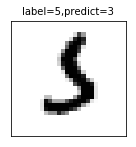

In [40]:
#直接看判讀錯誤圖到底長什麼樣子
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

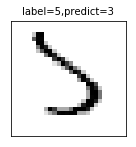

In [41]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1393,num=1)

## 儲存這次訓練結果

In [43]:
model.save_weights("Savemodel/MNIST_h1_300.h5")
print('model saved to disk')

model saved to disk


# 範例綜合：資料預處理、建立模型、評估學習/loss、訓練、測試、結果統計視覺化

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 800)               640800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
34s - loss: 0.3903 - acc: 0.8778 - val_loss: 0.1382 - val_acc: 0.95

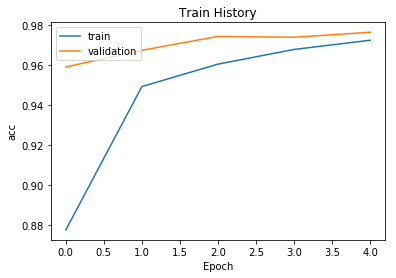

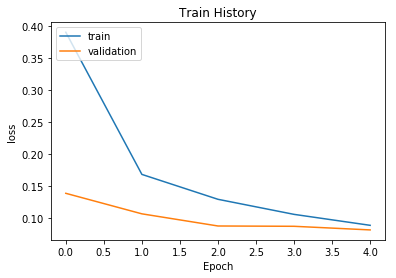

 9984/10000 [============================>.] - ETA: 0s
accuracy= 0.9785
 9984/10000 [============================>.] - ETA: 0s

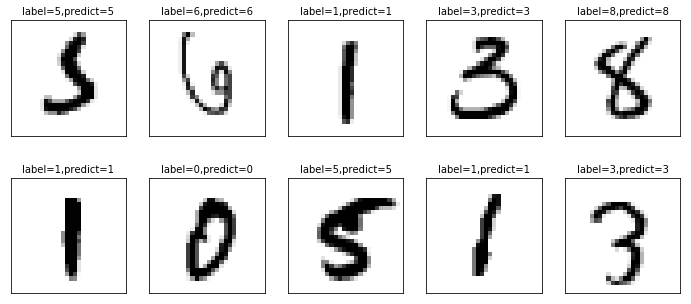

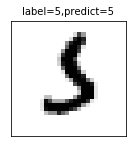

model saved to disk


In [45]:
import numpy as np
import pandas as pd #版本要0.19.2以下，最新不行
from keras.utils import np_utils
np.random.seed(10)
import matplotlib.pyplot as plt 

######################### 好用視覺處理
#畫圖用
def plot_image(image):
    figsize = (2,2)
    fig = plt.figure(figsize=figsize)
    plt.imshow(image, cmap='binary') #binary就是黑白
    plt.show()

#查詢結果相當好用
#列出該image，顯示label，若是有prediction則一起列出，idx表示想列的起始圖, num表示往後延伸幾張圖（最多25張）
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) #5行5列
        ax.imshow(images[idx], cmap='binary') #第idx張圖，黑白圖
        title= "label=" +str(labels[idx])
        if len(prediction)>0: #有prediction就多印出來
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
    
#plot_images_labels_prediction(x_train_image,y_train_label,[],0,10) 
#還沒做prediction，是空清單

#訓練過程視覺化，分成train和validation，方便看有沒有overfitting
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


######################### 資料預處理    
#先load一發data
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

#input轉乘1x784，並且換成float32形式
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

#input x 矩陣最大數值就是255，直接除下去normalize一下0~1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

#output y 是0~9分類題onehot encode（表示向量只有對的選項是1、其他都是0）
#分類（選擇）題一律都使用categorical
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)


######################### 建立模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() #一層一層到底，按順序

#輸入層（隱藏層1）
model.add(Dense(units=800, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))

#隱藏層2，不用寫input_dim，因為就是前一層的units
model.add(Dense(units=800,  
                kernel_initializer='normal', 
                activation='relu'))

#使用dropout避免overfitting
model.add(Dropout(0.5))


#輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary()) #可以清楚看到model還有參數數量


######################### 訓練模型
#選擇loss度量，optimizer學習路徑速度、
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#開始train，並且記錄情況(設有val項以免overfitting)
train_history=model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                        validation_split=0.2, epochs=5, batch_size=200, verbose=2) #verbose=2表示顯示訓練過程


######################### 訓練過程視覺化
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 實際測驗得分
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('\n')
print('accuracy=',scores[1])

######################### 紀錄模型預測情形（答案卷）
prediction=model.predict_classes(x_Test)

plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340, num=10) #隨便抽出來看


######################### 測驗結果統計視覺化
#crosstab統計混淆矩陣，觀察什麼題目答錯最多
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

#此df直接儲存標準答案和機器答案，方便看特定條件作答情形
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})

#答案是5，機器看成3度圖片
df[(df.label==5)&(df.predict==3)] 

#直接看判讀錯誤圖到底長什麼樣子
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

#儲存訓練結果
model.save_weights("Savemodel_Keras/MNIST_h1_800_dropout.h5")
print('model saved to disk')

In [46]:
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,1,0,0,3,1,2,0
1,0,1127,1,1,0,0,1,0,5,0
2,6,2,1004,3,1,0,2,4,9,1
3,1,0,4,990,0,2,0,5,6,2
4,1,2,3,1,958,0,3,2,2,10
5,3,0,0,7,1,867,7,0,6,1
6,4,3,0,1,4,2,941,0,3,0
7,1,5,5,2,0,0,0,1003,5,7
8,4,0,2,3,3,1,2,3,955,1
